In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
def load_data(file_path):
    data=[]
    label=[]
    with open(file_path,"r") as data_file:
        raw_data=data_file.readlines()
        for raw_line in raw_data:
            sample=raw_line[:-1]
            sample=sample.split(",")
            label.append(sample[-1])
            sample=np.array([float(feature) for feature in sample[:-1]])
            sample[-3]/=10
            sample[-2]/=100
            sample[-1]/=1000
            data.append(sample)
    return np.array(data),np.array(label)
train_data,train_label=load_data("./train.data")
test_data,test_label=load_data("./test.data")
#定义一个读取文件函数

In [3]:
from tensorflow.keras import layers
model = tf.keras.Sequential([
layers.Dense(57, activation='softmax'),
layers.Dense(1, activation='relu')])

记得吴恩达在介绍监督学习的时候提到过relu函数

In [4]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [5]:
history = model.fit(train_data,
                    train_label,
                    epochs=40,
                    batch_size=100,
                    validation_data=(test_data, test_label),
                    verbose=1)

Train on 3224 samples, validate on 1377 samples
Epoch 1/40
3224/3224 [==============================] - 0s 98us/step - loss: 1.0309 - acc: 0.6061 - val_loss: 0.8637 - val_acc: 0.6057
Epoch 2/40
3224/3224 [==============================] - 0s 16us/step - loss: 0.8082 - acc: 0.6061 - val_loss: 0.7403 - val_acc: 0.6057
Epoch 3/40
3224/3224 [==============================] - 0s 16us/step - loss: 0.7114 - acc: 0.6061 - val_loss: 0.6634 - val_acc: 0.6057
Epoch 4/40
3224/3224 [==============================] - 0s 17us/step - loss: 0.6456 - acc: 0.6061 - val_loss: 0.6078 - val_acc: 0.6057
Epoch 5/40
3224/3224 [==============================] - 0s 19us/step - loss: 0.5957 - acc: 0.6061 - val_loss: 0.5625 - val_acc: 0.6057
Epoch 6/40
3224/3224 [==============================] - 0s 16us/step - loss: 0.5550 - acc: 0.6061 - val_loss: 0.5253 - val_acc: 0.6064
Epoch 7/40
3224/3224 [==============================] - 0s 17us/step - loss: 0.5205 - acc: 0.6182 - val_loss: 0.4926 - val_acc: 0.6267
Epoch 8

In [6]:
history_dict = history.history
history_dict.keys()
dict_keys = ['loss', 'val_loss', 'val_acc', 'acc']

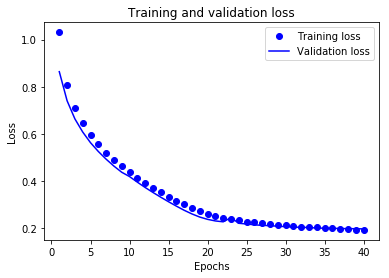

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" 代表蓝点
plt.plot(epochs, loss, 'bo', label='Training loss')
# b 代表蓝色实线
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

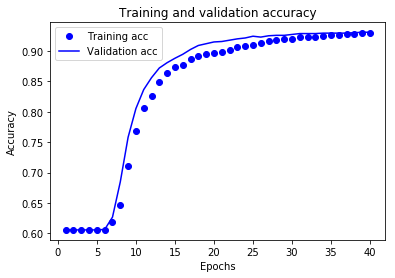

In [8]:

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()